In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

np.random.seed(123)
plt.style.use('Solarize_Light2')

In [55]:
cdf_path = './../data/cdf_vs_sep.csv'
cdf_data = np.loadtxt(cdf_path, delimiter=',')

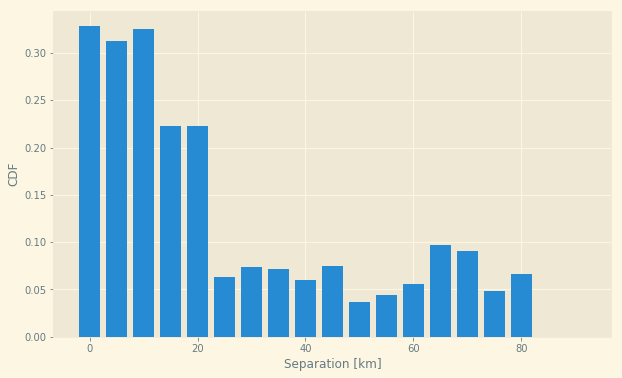

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(cdf_data[:, 0], cdf_data[:, 1], width=0.8*(cdf_data[1, 0]-cdf_data[0, 0]));
plt.xlabel('Separation [km]'); plt.ylabel('CDF');

Make a Monte Carlo model for microburst scale size distribution

In [61]:
grid_size = 200
n_bursts = 1000

Define spacecraft A's position and a family of spacecraft B's positions that will be used to calculate the CDF.

In [62]:
sc_A = (0, 0)
sc_B = [(0, di) for di in cdf_data[:, 0]]

Now generate n_bursts worth of microbursts within the grid, using a normally distributed scale size distribution.

In [72]:
burst_size = np.abs(np.random.normal(scale=20, size=n_bursts))
burst_x = np.random.uniform(-grid_size, grid_size, size=n_bursts)
burst_y = np.random.uniform(-grid_size, grid_size, size=n_bursts)

Now plot a few example microbursts on the grid

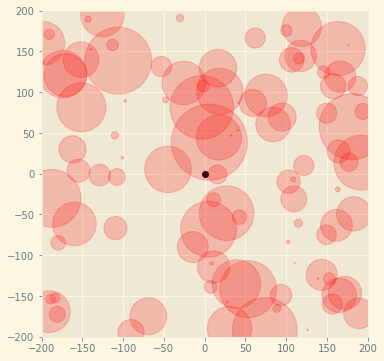

In [73]:
plot_n = 100
circles = plot_n*[None]
fig, ax = plt.subplots(figsize=(6, 6))

for c in range(plot_n):
    circles[c] = plt.Circle((burst_x[c], burst_y[c]), burst_size[c], color='r', alpha=0.2)
    ax.add_artist(circles[c])
plt.xlim(-grid_size, grid_size); plt.ylim(-grid_size, grid_size)
plt.scatter(*sc_A, c='k')
ax.set_aspect(1.0)